## Exploratory Data Analysis on Amazon fine food reviews

### Data Description
- This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.

### Data includes:
- Reviews from Oct 1999 - Oct 2012 - 568,454 reviews
- 256,059 Users and 74,258 products
- 260 users with > 50 reviews

### The columns in tables are : 
- Id - Unique row number
- ProductId - Unique identifier for the product
- UserId - Unique identifier for the user
- ProfileName
- HelpfulnessNumerator - Number of users who found the review helpful
- HelpfulnessDenominator - Number of users who indicated whether they found the review helpful
- Score - Rating between 1 and 5
- Time - Timestamp for the review
- ReviewSummary - Brief summary of the review
- ReviewText - Text of the review

#### NOTE - Helpfulness (fraction of users who found the review helpful) = HelpfulnessNumerator / HelpfulnessDenominator



In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
df = pd.read_feather('review_clean1.ftr')

In [3]:
df.head()

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,ColumnA
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned ...
1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for the...
2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hate...
3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large..."
4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and consti...


In [4]:
#checking null values
df.isnull().sum()

col_1      0
col_2      0
col_3      0
col_4      0
col_5      0
col_6      0
col_7      0
col_8      0
ColumnA    0
dtype: int64

In [5]:
#changing the column names
df.columns = ['ProductId','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Score','Time','ReviewSummary ','ReviewText']

In [6]:
df.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned ...
1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for the...
2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hate...
3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large..."
4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and consti...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568279 entries, 0 to 568278
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ProductId               568279 non-null  object
 1   UserId                  568279 non-null  object
 2   ProfileName             568279 non-null  object
 3   HelpfulnessNumerator    568279 non-null  object
 4   HelpfulnessDenominator  568279 non-null  object
 5   Score                   568279 non-null  object
 6   Time                    568279 non-null  object
 7   ReviewSummary           568279 non-null  object
 8   ReviewText              568279 non-null  object
dtypes: object(9)
memory usage: 39.0+ MB


In [8]:
#checking unique values in helpfulnessdenominator
df.HelpfulnessDenominator.unique()

array([' 1', ' 0', ' 5', ' 12', ' 2', ' 6', ' 3', ' 4', ' 10', ' 77',
       ' 62', ' 9', ' 26', ' 15', ' 20', ' 22', ' 11', ' 34', ' 16',
       ' 43', ' 52', ' 39', ' 42', ' 8', ' 30', ' 7', ' 19', ' 13', ' 25',
       ' 18', ' 28', ' 17', ' 14', ' 24', ' 75', ' 48', ' 29', ' 38',
       ' 23', ' 95', ' 27', ' 33', ' 31', ' 21', ' 32', ' 41', ' 82',
       ' 57', ' 35', ' 72', ' 103', '18"', ' 37', ' 58', ' 51', ' 45',
       ' 36', ' 47', ' 93', ' 44', ' 60', ' 61', ' 53', ' 156', ' 110',
       ' 69', ' 83', ' 64', ' 40', ' 144', ' 92', ' 80', ' 59', ' 68',
       ' 50', ' 562', ' 477', ' 235', ' 88', ' 139', ' 56', ' 87', ' 71',
       ' 98', ' 49', ' 91', ' 219', ' 67', ' 63', ' 70', ' 127', ' 162',
       ' 55', ' 155', ' 85', ' 181', ' 46', ' 81', ' 84', ' 356', ' 135',
       ' 245', ' 54', ' 216', ' 99', ' 462', ' 174', ' 111', ' 128',
       ' 117', ' 134', ' 79', ' 76', ' 182', ' 66', ' 143', ' 163', ' 65',
       ' 74', ' 89', ' 179', ' 159', ' 101', ' 171', ' 97', ' 108',

In [9]:
# removing the extra spaces in helpfuldenominator
df.HelpfulnessDenominator = df.HelpfulnessDenominator.apply(lambda x : x.strip(' '))

In [10]:
# checking unique values
df.HelpfulnessDenominator.unique()

array(['1', '0', '5', '12', '2', '6', '3', '4', '10', '77', '62', '9',
       '26', '15', '20', '22', '11', '34', '16', '43', '52', '39', '42',
       '8', '30', '7', '19', '13', '25', '18', '28', '17', '14', '24',
       '75', '48', '29', '38', '23', '95', '27', '33', '31', '21', '32',
       '41', '82', '57', '35', '72', '103', '18"', '37', '58', '51', '45',
       '36', '47', '93', '44', '60', '61', '53', '156', '110', '69', '83',
       '64', '40', '144', '92', '80', '59', '68', '50', '562', '477',
       '235', '88', '139', '56', '87', '71', '98', '49', '91', '219',
       '67', '63', '70', '127', '162', '55', '155', '85', '181', '46',
       '81', '84', '356', '135', '245', '54', '216', '99', '462', '174',
       '111', '128', '117', '134', '79', '76', '182', '66', '143', '163',
       '65', '74', '89', '179', '159', '101', '171', '97', '108', '249',
       '384', '187', '121', '263', '120', '78', '168', '133', '\\x1a',
       '94', '188', '131', '137', '165', '96', '73', '416', 

In [11]:
# copying the data frame to df1 so that original dataframe remain same 
df1 = df.copy()

In [12]:
# changing the datatype of helpfulnessdenominator
df1.HelpfulnessDenominator = pd.to_numeric(df1.HelpfulnessDenominator, errors='coerce')

In [13]:
# checking null values
df1.HelpfulnessDenominator.isnull().sum()

30

In [14]:
df1.HelpfulnessDenominator.unique()

array([  1.,   0.,   5.,  12.,   2.,   6.,   3.,   4.,  10.,  77.,  62.,
         9.,  26.,  15.,  20.,  22.,  11.,  34.,  16.,  43.,  52.,  39.,
        42.,   8.,  30.,   7.,  19.,  13.,  25.,  18.,  28.,  17.,  14.,
        24.,  75.,  48.,  29.,  38.,  23.,  95.,  27.,  33.,  31.,  21.,
        32.,  41.,  82.,  57.,  35.,  72., 103.,  nan,  37.,  58.,  51.,
        45.,  36.,  47.,  93.,  44.,  60.,  61.,  53., 156., 110.,  69.,
        83.,  64.,  40., 144.,  92.,  80.,  59.,  68.,  50., 562., 477.,
       235.,  88., 139.,  56.,  87.,  71.,  98.,  49.,  91., 219.,  67.,
        63.,  70., 127., 162.,  55., 155.,  85., 181.,  46.,  81.,  84.,
       356., 135., 245.,  54., 216.,  99., 462., 174., 111., 128., 117.,
       134.,  79.,  76., 182.,  66., 143., 163.,  65.,  74.,  89., 179.,
       159., 101., 171.,  97., 108., 249., 384., 187., 121., 263., 120.,
        78., 168., 133.,  94., 188., 131., 137., 165.,  96.,  73., 416.,
       106., 878., 536., 238., 119., 109.,  90.,  8

In [15]:
# replacing null values of heplfullnessdenominator with 0
df1.HelpfulnessDenominator.fillna('0',inplace=True)

In [16]:
df1.HelpfulnessDenominator.isnull().sum()

0

In [17]:
# converting datatype of helpfulnessdenominator from float to int
df1.HelpfulnessDenominator = df1.HelpfulnessDenominator.astype(int)

In [18]:
# checking info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568279 entries, 0 to 568278
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ProductId               568279 non-null  object
 1   UserId                  568279 non-null  object
 2   ProfileName             568279 non-null  object
 3   HelpfulnessNumerator    568279 non-null  object
 4   HelpfulnessDenominator  568279 non-null  int32 
 5   Score                   568279 non-null  object
 6   Time                    568279 non-null  object
 7   ReviewSummary           568279 non-null  object
 8   ReviewText              568279 non-null  object
dtypes: int32(1), object(8)
memory usage: 36.9+ MB


In [19]:
# checking unique values in helpfulnessnumerator
df1.HelpfulnessNumerator.unique()

array([' 1', ' 0', ' 2', ' 6', ' 3', ' 4', ' 67', ' 52', ' 9', ' 20',
       ' 10', ' 11', ' 28', ' 30', ' 7', ' 5', ' 8', ' 14', ' 12', ' 33',
       ' 18', ' 13', ' 26', ' 40', ' 16', '//www.thehorseyset.net"',
       ' 24', ' 15', ' 75', '|"', ' 46', ' 29', ' 23', ' 39', ' 38',
       ' 17', ' 21', ' 88', ' 31', ' 43', ' 37', ' 73', ' 53', ' 22',
       ' 70', ' 97', ' 25', ' 19', ' 58', ' 50', ' 45', ' 35', ' 41',
       ' 27', ' 42', ' 44', ' 56', ' 32', ' 154', ' 105', ' 60',
       'D "Always learning co...', ' 64', ' 34', ' 47', ' 74', ' 57',
       ' 36', ' 49', ' 117', ' 72', '8"', ' 83', ' 48',
       ' accept no substitute"', ' 55', ' 78', ' 61', ' 66',
       '11 "Energy Being"', ' )', '//freeradicalfederation.com"', ' 559',
       ' 472', ' 232', ' 135', ' 84', ' 69', ' 91', '-)', ' 85', ' 86',
       ' 202', '-) "Misty"', ' 113', ' 141', ' 149', ' 80', ' 77', 'q!"',
       ' 162', ')', '-)"', 'The Short Course in Beer', '  Those who...',
       ' Just Folks"', ' 59', ' 3

In [20]:
df2 = df1.copy()

In [21]:
# changing the datatype of helpfulnessnumerator 
df2.HelpfulnessNumerator = pd.to_numeric(df2.HelpfulnessNumerator, errors='coerce')

In [22]:
# checking the null values
df2.HelpfulnessNumerator.isnull().sum()

491

In [23]:
# checking the unique values
df2.HelpfulnessNumerator.unique()

array([  1.,   0.,   2.,   6.,   3.,   4.,  67.,  52.,   9.,  20.,  10.,
        11.,  28.,  30.,   7.,   5.,   8.,  14.,  12.,  33.,  18.,  13.,
        26.,  40.,  16.,  nan,  24.,  15.,  75.,  46.,  29.,  23.,  39.,
        38.,  17.,  21.,  88.,  31.,  43.,  37.,  73.,  53.,  22.,  70.,
        97.,  25.,  19.,  58.,  50.,  45.,  35.,  41.,  27.,  42.,  44.,
        56.,  32., 154., 105.,  60.,  64.,  34.,  47.,  74.,  57.,  36.,
        49., 117.,  72.,  83.,  48.,  55.,  78.,  61.,  66., 559., 472.,
       232., 135.,  84.,  69.,  91.,  85.,  86., 202., 113., 141., 149.,
        80.,  77., 162.,  59., 349., 130., 230.,  51., 189.,  89.,  65.,
       454., 172., 116.,  96.,  81.,  63., 179., 138., 137., 157.,  71.,
        54., 166., 142., 170.,  68., 247., 366., 165., 106., 219.,  94.,
       111., 110.,  76., 100., 119.,  92.,  79., 115.,  93., 180., 129.,
       131., 125., 123.,  95., 413., 139., 866., 524., 233.,  82., 107.,
        62., 104., 844.,  99., 144., 124., 491., 35

In [24]:
# filling the null values
df2.HelpfulnessNumerator.fillna('0',inplace = True)

In [25]:
# changing the datatype from float to int
df2.HelpfulnessNumerator = df2.HelpfulnessNumerator.astype(int)

In [26]:
df2.HelpfulnessNumerator.isnull().sum()

0

In [27]:
# checking the info
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568279 entries, 0 to 568278
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ProductId               568279 non-null  object
 1   UserId                  568279 non-null  object
 2   ProfileName             568279 non-null  object
 3   HelpfulnessNumerator    568279 non-null  int32 
 4   HelpfulnessDenominator  568279 non-null  int32 
 5   Score                   568279 non-null  object
 6   Time                    568279 non-null  object
 7   ReviewSummary           568279 non-null  object
 8   ReviewText              568279 non-null  object
dtypes: int32(2), object(7)
memory usage: 34.7+ MB


In [28]:
# checking unique values of score
df2.Score.unique()

array([' 5', ' 1', ' 2', ' 4', ' 3', ' 0', ' 45', ' 14', ' 9', ' 63',
       ' 86', ' 10', ' 6', ' 20', ' 23', ' 36', ' 13', ' 32', ' 25', ' 8',
       ' 17', ' 16', ' 22', ' 7', '*¨¨*', ' 11', ' 12', ' 46', ' 61',
       ' 29', ' 27', ' 15', ' 24'], dtype=object)

In [29]:
# checking the counts of score
df2.Score.value_counts()

 5      362678
 4       80593
 1       52290
 3       42632
 2       29814
 0         178
 14         11
 6          10
 10          8
 8           8
 86          7
 9           7
 45          4
 11          4
 7           4
 32          3
 25          3
 12          3
 36          3
 23          2
 16          2
 22          2
 29          2
 63          2
 27          1
 61          1
 15          1
 13          1
 46          1
*¨¨*         1
 17          1
 20          1
 24          1
Name: Score, dtype: int64

In [30]:
# changing the datatype of score
df2.Score = pd.to_numeric(df2.Score, errors='coerce')

In [31]:
# checking the null values
df2.Score.isnull().sum()

1

In [32]:
# filling the null values
df2.Score.fillna('0',inplace = True)

In [33]:
# changing the datatype from float to int
df2.Score = df2.Score.astype(int)

In [34]:
# checking the score count which is greater than 5
df2[df2.Score > 5]['Score'].count()

93

In [35]:
#removing the rows which having score more than 5
df2 = df2[df2.Score <= 5]

In [36]:
df2[df2.Score > 5]['Score'].count()

0

In [37]:
df2.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned ...
1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for the...
2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hate...
3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large..."
4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and consti...


In [38]:
df2.Score.value_counts()

5    362678
4     80593
1     52290
3     42632
2     29814
0       179
Name: Score, dtype: int64

In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568186 entries, 0 to 568278
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ProductId               568186 non-null  object
 1   UserId                  568186 non-null  object
 2   ProfileName             568186 non-null  object
 3   HelpfulnessNumerator    568186 non-null  int32 
 4   HelpfulnessDenominator  568186 non-null  int32 
 5   Score                   568186 non-null  int32 
 6   Time                    568186 non-null  object
 7   ReviewSummary           568186 non-null  object
 8   ReviewText              568186 non-null  object
dtypes: int32(3), object(6)
memory usage: 36.8+ MB


In [40]:
df2.Score.value_counts(normalize=True)

5    0.638309
4    0.141843
1    0.092030
3    0.075032
2    0.052472
0    0.000315
Name: Score, dtype: float64

### Distribution of Ratings

C:\Users\prashanth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Score', ylabel='count'>

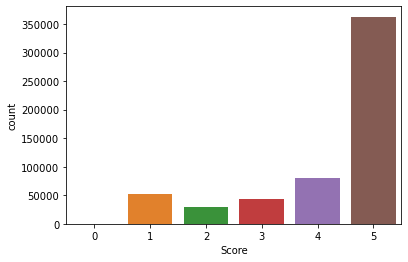

In [42]:
# plotting rating distribution
sns.countplot(df2.Score)

- 5 star review constitute a large proportion(64%) of all reviews. The next most review is 4 star(14%) followed by 1 star(9%),3 star(7%) and finally 2 star(5%)

#### lets consider
- Positive review (4-5 Rating)
- Negative review (1-2 Rating)

In [43]:
# removing 3 and 0 score from dataframe
df3 = df2[df2.Score != 3]
df3 = df3[df3.Score != 0]

In [44]:
df3.Score.value_counts()

5    362678
4     80593
1     52290
2     29814
Name: Score, dtype: int64

In [45]:
# mapping the positive and negative to Score based on condition
df3['Rating'] = df3.Score.apply(lambda x :  'Positive'    if x == 5 or x == 4 else 'Negative')

In [46]:
df3.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,Rating
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned ...,Positive
1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for the...,Positive
2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hate...,Negative
3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large...",Negative
4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and consti...,Positive


In [47]:
# checking the value_counts of Rating
df3.Rating.value_counts()

Positive    443271
Negative     82104
Name: Rating, dtype: int64

### Popular words in Positive Reviews (4-5 Rating)

In [48]:
# creating new df positive
positive = df3[df3.Rating == 'Positive']['ReviewText']

In [49]:
positive

0          I have bought several of the Vitality canned ...
1          This is a very healthy dog food. Good for the...
4          We have a 7 week old... He had gas and consti...
5          I love this noodle and have it once or twice ...
7          The taste is great! especially when you cook ...
                                ...                        
568274     I love these noodle.  A little to spicy for t...
568275     I just love it and will buy another box when ...
568276     My late father in law used to have a rating s...
568277     This is my favorite brand of Korean ramen. It...
568278     I do like these noodles although, to say they...
Name: ReviewText, Length: 443271, dtype: object

In [50]:
# importing wordcloud library
from wordcloud import WordCloud, STOPWORDS

In [51]:
# importing stopwords
from nltk.corpus import stopwords

In [52]:
# joing the positive text
text_postive = ' '.join(positive)

In [53]:
# removing 'br' from text
cleaned_positve = ' '.join([word for word in text_postive.split()
                       if 'br' not in word])

In [54]:
# creating positive wordcloud
positive_wordcloud = WordCloud(stopwords = stopwords.words('english'),
                          background_color='White',
                          width=1600,
                          height=800).generate(cleaned_positve)

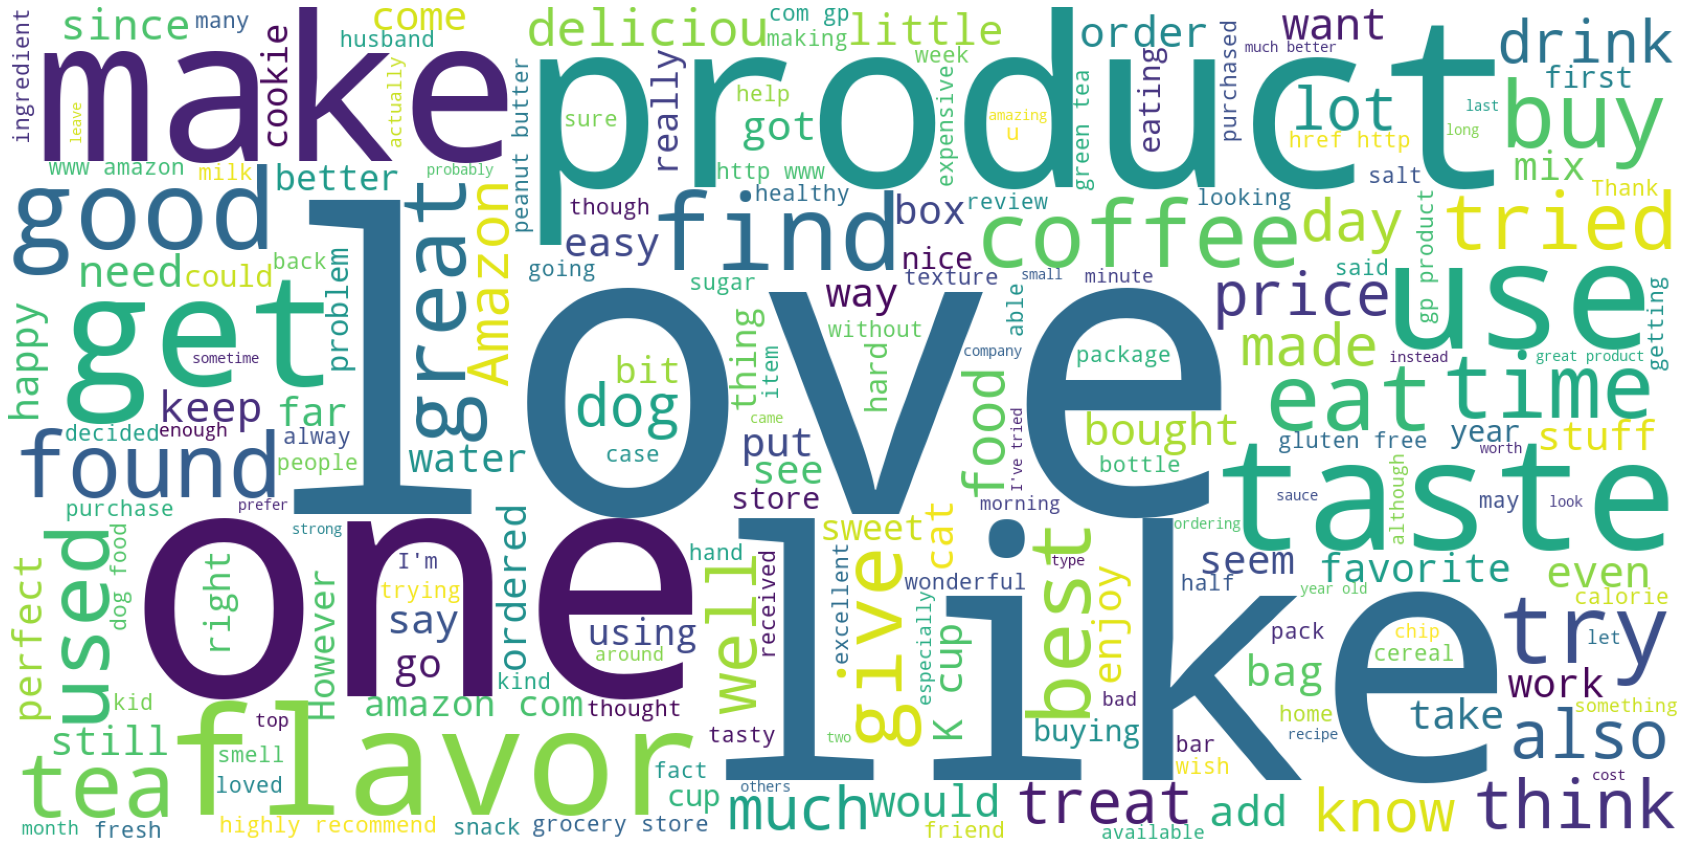

In [55]:
# plotting wordcount of positive text
plt.figure(1,figsize=(30,20))
plt.imshow(positive_wordcloud)
plt.axis('off')
plt.show()

### Popular words in Negative Reviews (1-2 Rating)

In [56]:
# creating negative dataframe
Negative = df3[df3.Rating == 'Negative']['ReviewText']

In [57]:
# joining and cleaning negative text
text_negative = ' '.join(Negative)
cleaned_negative = ' '.join([word for word in text_negative.split()
                       if 'br' not in word])

In [58]:
# creating negative wordcloud
negative_wordcloud = WordCloud(stopwords = stopwords.words('english'),
                          background_color='White',
                          width=1600,
                          height=800).generate(cleaned_negative)

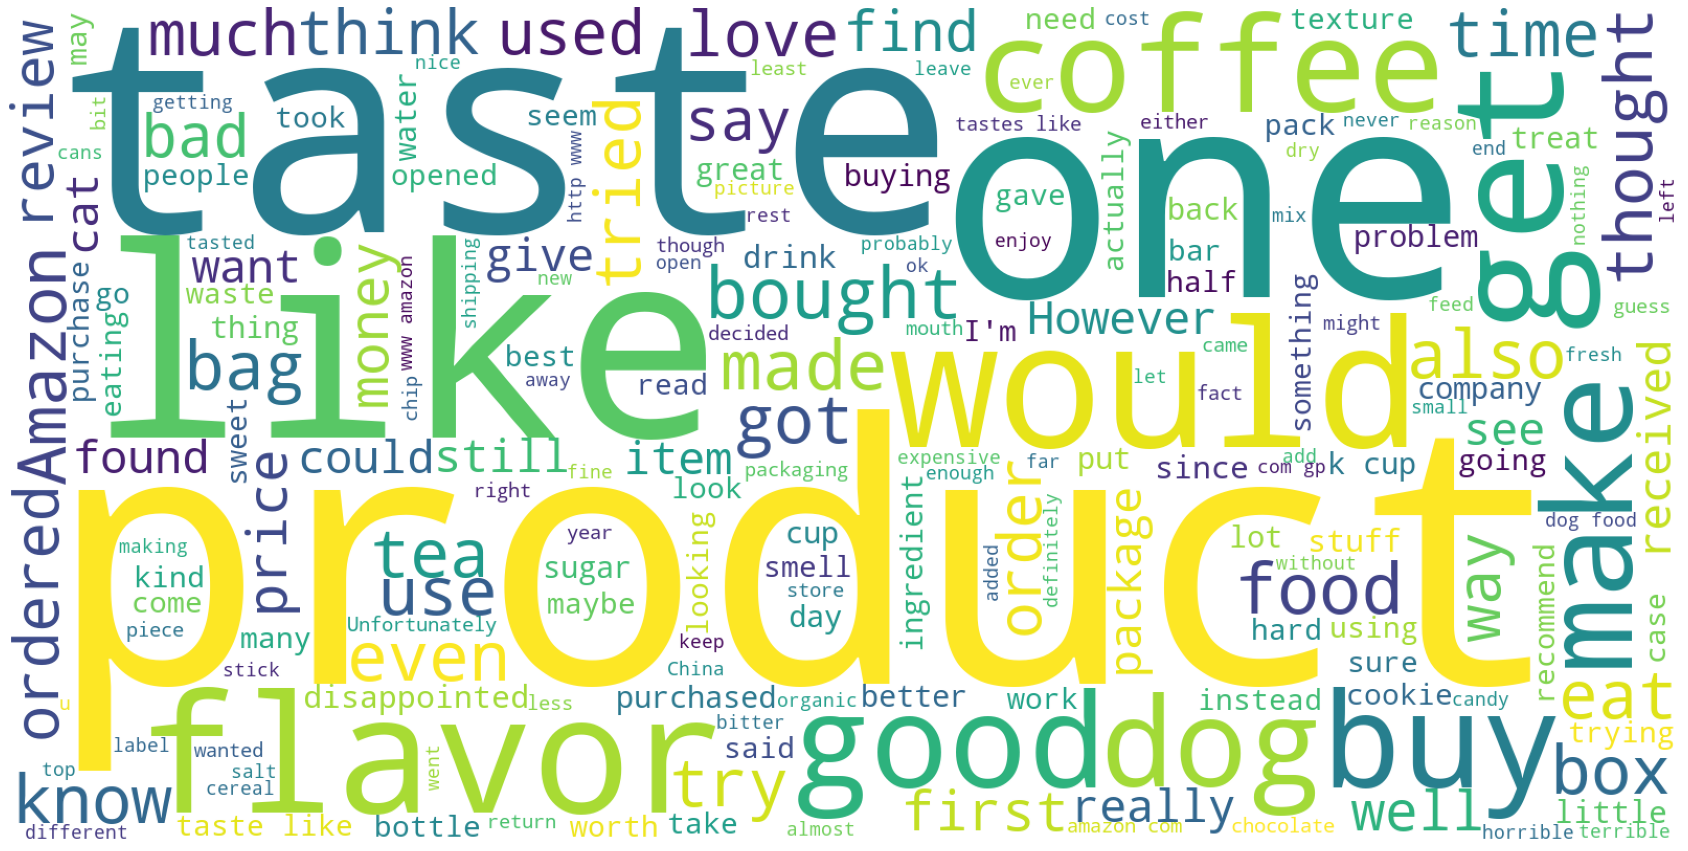

In [59]:
# plotting wordcloud
plt.figure(1,figsize=(30,20))
plt.imshow(negative_wordcloud)
plt.axis('off')
plt.show()

In [60]:
# creating Helpful
Helpful = df3.HelpfulnessNumerator/df3.HelpfulnessDenominator

In [61]:
Helpful = Helpful*100

In [62]:
Helpful

0         100.0
1           NaN
2           0.0
3          40.0
4           0.0
          ...  
568274     40.0
568275     40.0
568276     40.0
568277     40.0
568278     40.0
Length: 525375, dtype: float64

#### Divide this Helpful into four categories
- No Indication(not voted at all)
- Helpful reviews had more than 75% of voters find the review helpful
- Unhelpful reviews had less than 25% of voters find the review helpful
- Intermediate group of 25-75% helpfulness

In [63]:
# creating dataframe of helpful
Helpful = pd.DataFrame(Helpful)

In [64]:
# creating column in df helpful
Helpful.columns = ['Helpfullness']

In [65]:
# creating helpful_cat function to differentiate helpfulness
def helpful_cat(x):
    if x > 75:
        return 'Helpful'
    elif x < 25:
        return 'Unhelpful'
    elif x >= 25 and x <= 75:
        return 'Intermediate'
    else:
        return 'No indication'

In [66]:
# applying the function to helpful dataframe
Helpful['category'] = Helpful['Helpfullness'].apply(helpful_cat)

In [67]:
Helpful.head()

,Helpfullness,category
0,100.0,Helpful
1,NaN,No indication
2,0.0,Unhelpful
3,40.0,Intermediate
4,0.0,Unhelpful


In [68]:
# checking helpful category valuecount
Helpful.category.value_counts(normalize=True)

No indication    0.478569
Helpful          0.363616
Intermediate     0.095349
Unhelpful        0.062466
Name: category, dtype: float64

### Distribution of Helpfulness

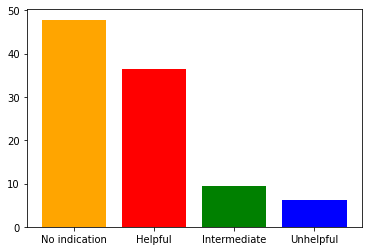

In [69]:
# plotting distribution 0f helpfulness
height = Helpful.category.value_counts(normalize=True).values*100
bars = Helpful.category.value_counts(normalize=True).index
x_pos = np.arange(len(bars))

# Create bars with different colors
plt.bar(x_pos, height, color=['Orange', 'red', 'green', 'blue', 'cyan'])

# Create names on the x-axis
plt.xticks(x_pos, bars)

# Show graph
plt.show()

#### lets consider Helpful and unhelpful

In [70]:
# copy df3 into df4
df4 = df3.copy()

In [71]:
# concat helpful and df4
df4 = pd.concat([df4,Helpful],axis = 1)

In [72]:
df4.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,Rating,Helpfullness,category
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned ...,Positive,100.0,Helpful
1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for the...,Positive,NaN,No indication
2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hate...,Negative,0.0,Unhelpful
3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large...",Negative,40.0,Intermediate
4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and consti...,Positive,0.0,Unhelpful


In [73]:
# removing no indication from df4
df4 = df4[df4.category != 'No indication']

In [74]:
# checking shape of df4
df4.shape

(273947, 12)

### How does rating affect Helpfulness?

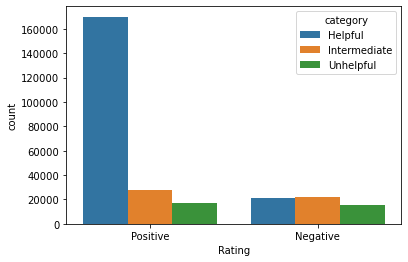

In [105]:
sns.countplot(x='Rating', hue='category', order=["Positive", "Negative"], 
              hue_order=['Helpful', 'Intermediate', 'Unhelpful'], data=df4)
plt.xlabel('Rating')
plt.show()

- As the rating becomes more positive, the reviews become more helpful (and less unhelpful).

In [77]:
df2.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned ...
1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for the...
2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hate...
3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large..."
4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and consti...


In [78]:
# creating dataframe df5 from df2 by removing 0 score
df5 = df2[df2.Score != 0]

In [79]:
df5.Score.unique()

array([5, 1, 2, 4, 3])

In [80]:
df5.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned ...
1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for the...
2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hate...
3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large..."
4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and consti...


### Word Count

In [82]:
# importing regular expression library
import re

In [83]:
# creating wordcount function
def word_count(x):
    res = len(re.findall(r'\w+',x))
    return res

In [84]:
# applying the wordcount function reviewtext column
df5['Wordcount'] = df5.ReviewText.apply(word_count)

C:\Users\PRASHA~1\AppData\Local\Temp/ipykernel_10420/1011902112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Wordcount'] = df5.ReviewText.apply(word_count)


In [85]:
df5.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,Wordcount
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned ...,48
1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for the...,25
2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hate...,37
3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large...",102
4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and consti...,199


### How does word count vary by rating?

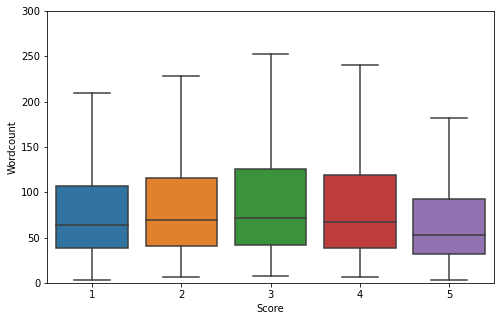

In [86]:
# plotting word count v/s score 
plt.figure(figsize=(8,5))
sns.boxplot(x = 'Score',y = 'Wordcount',data = df5, showfliers=False)
plt.ylim(0,300)
plt.show()


- 5-star reviews had the lowest median word count (53 words), while 3-star reviews had the largest median word count (71 words).

In [87]:
df4.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,Rating,Helpfullness,category
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned ...,Positive,100.0,Helpful
2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hate...,Negative,0.0,Unhelpful
3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large...",Negative,40.0,Intermediate
4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and consti...,Positive,0.0,Unhelpful
5,B000LQORDE,A19W47CXJJP1MI,Amazonian Consumer,2,5,5,1235088000,"This spicy noodle cures my cold, upset stomac...",I love this noodle and have it once or twice ...,Positive,40.0,Intermediate


In [88]:
# applying word count function to datframe df4 review text
df4['Wordcount'] = df4.ReviewText.apply(word_count)

### How does word count relate to helpfulness?

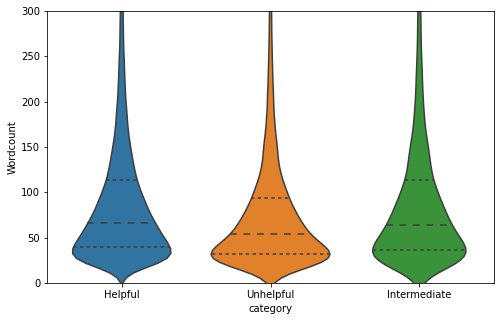

In [89]:
# plotting wordcount v/s helpfulness
plt.figure(figsize=(8,5))
sns.violinplot(x = 'category',y = 'Wordcount',data = df4,gridsize=500,inner='quartile')
plt.ylim(0,300)
plt.show()

- Helpful reviews have a higher median word count (67 words) than not helpful reviews (54 words) and intermediate have almost same as helpful.

In [ ]:
df5.head()

### Frequency of reviewers

In [90]:
# creating dictionary of userid valuecounts
x = df5.UserId.value_counts()
x.to_dict()
print(x)

 A3OXHLG6DIBRW8    448
 A1YUL9PCJR3JTY    421
 AY12DBB0U420B     389
 A281NPSIMI1C2R    365
 A1Z54EM24Y40LL    256
                  ... 
 A22WDVZ0X0WSC2      1
 A3U6AAJ5TCCB2M      1
 AAIJELL9Q3ST8       1
 AKOQOXY0AQW8U       1
 A9Q950IPXJR1D       1
Name: UserId, Length: 255923, dtype: int64


In [92]:
# applying the frequency to userid
df5['reviewerfrequency'] = df5.UserId.apply(lambda index :  "Frequent" if x[index] > 50 else "Not Frequent")

C:\Users\PRASHA~1\AppData\Local\Temp/ipykernel_10420/2089917356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['reviewerfrequency'] = df5.UserId.apply(lambda index :  "Frequent" if x[index] > 50 else "Not Frequent")


In [93]:
df5.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,Wordcount,reviewerfrequency
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned ...,48,Not Frequent
1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for the...,25,Not Frequent
2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hate...,37,Not Frequent
3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large...",102,Not Frequent
4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and consti...,199,Not Frequent


### Are frequent reviewers more discerning?

<AxesSubplot:xlabel='Score', ylabel='count'>

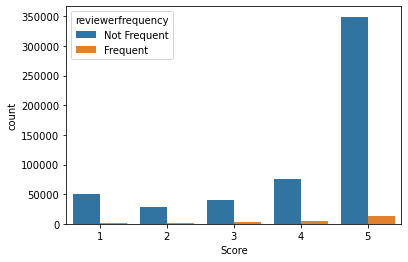

In [94]:
# plotting countplot of score with hue reviewer frequency
sns.countplot(x = 'Score',data = df5,hue = 'reviewerfrequency')

- The frequent reviewers give less 5-star reviews and less 1-star review. Frequent users appear to be more discerning in the sense that they give less extreme reviews than infrequent reviews

In [97]:
df4.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,Rating,Helpfullness,category,Wordcount
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned ...,Positive,100.0,Helpful,48
2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hate...,Negative,0.0,Unhelpful,37
3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large...",Negative,40.0,Intermediate,102
4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and consti...,Positive,0.0,Unhelpful,199
5,B000LQORDE,A19W47CXJJP1MI,Amazonian Consumer,2,5,5,1235088000,"This spicy noodle cures my cold, upset stomac...",I love this noodle and have it once or twice ...,Positive,40.0,Intermediate,54


In [98]:
x = df4.UserId.value_counts()
x.to_dict()
print(x)

 A1YUL9PCJR3JTY    342
 A281NPSIMI1C2R    227
 A3OXHLG6DIBRW8    216
 A3TVZM3ZIXG8YW    199
 AY12DBB0U420B     151
                  ... 
 A3S61UI3RKZ3V7      1
 A2TD42E7V0X6YV      1
 A3LDIN6BPXJO8T      1
 A1EW8KNHQWRKEB      1
 A9Q950IPXJR1D       1
Name: UserId, Length: 141105, dtype: int64


In [99]:
df4['reviewerfrequency'] = df4.UserId.apply(lambda index :  "Frequent" if x[index] > 50 else "Not Frequent")

### Are frequent reviewers more helpful?

<AxesSubplot:xlabel='category', ylabel='count'>

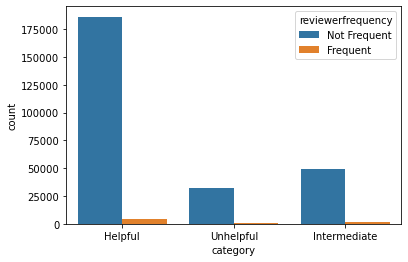

In [100]:
# creating count plot of helpfulness with hue of reviewerfrequency
sns.countplot(x = 'category',data = df4,hue = 'reviewerfrequency')

- frequent reviewers are more likely to have their review voted on and when voted on more likely to be voted helpful, and less likely to be unhelpful

### Are frequent reviewers more verbose?

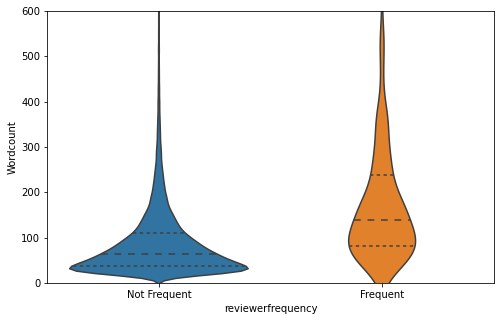

In [102]:
# create violinplot of reviewerfrequency v/s word count
plt.figure(figsize=(8,5))
sns.violinplot(x = 'reviewerfrequency',y = 'Wordcount',data = df4,gridsize=500,inner='quartile')
plt.ylim(0,600)
plt.show()

- The distributions of word counts for frequent and infrequent reviews shows that infrequent reviewers have a large amount of reviews of low word count. On the other hand, the largest concentration of word count is higher for frequent reviewers than for infrequent reviews. Moreover, the median word count for frequent reviewers is higher than the median for infrequent reviewers

### conclusion
- Positive reviews are very common.
- Positive reviews are shorter.
- Longer reviews are more helpful.
- Despite being more common and shorter, positive reviews are found more helpful.
- Frequent reviewers are more discerning in their ratings, write longer reviews, and write more helpful reviews